In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel("iris.xls")

In [3]:
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.shape

(150, 5)

In [6]:
df.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [7]:
df.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [17]:

df['SL']=df['SL'].fillna(df['SL'].median())
df['SW']=df['SW'].fillna(df['SW'].median())
df['PL']=df['PL'].fillna(df['PL'].bfill())
df['PW']=df['PW'].fillna(df['PW'].bfill())


In [18]:
df.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

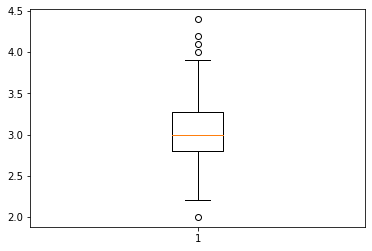

In [19]:
plt.figure()
plt.boxplot(df['SW'])
plt.show()

2.8
3.0
3.25
2.1249999999999996
3.9250000000000003


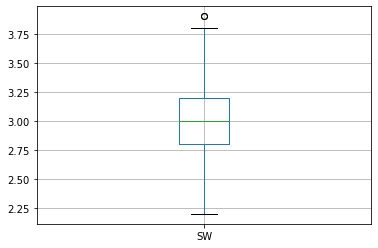

In [20]:
Q1=np.percentile(df['SW'],25, interpolation ='midpoint')
print(Q1)
Q2=np.percentile(df['SW'],50, interpolation ='midpoint')
print(Q2)
Q3=np.percentile(df['SW'],75, interpolation ='midpoint')
print(Q3)
IQR =Q3-Q1
low_limit = Q1-1.5*IQR
print(low_limit)
upper_limit =Q3+1.5*IQR
print(upper_limit)
ind_1 =df['SW']>upper_limit
df.drop(df.loc[ind_1].index,inplace =True)
ind_2 =df['SW']<low_limit
df.drop(df.loc[ind_2].index,inplace =True)
df[['SW']].boxplot()
plt.show()

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Classification"] = le.fit_transform(df["Classification"])


In [22]:
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.4,2.0,2
148,6.2,3.4,5.4,2.3,2


In [23]:
x=df.drop(['Classification'],axis=1)
y=df['Classification']

In [24]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=42,test_size=0.2)

# Logistic regression

In [25]:
from sklearn.linear_model import LogisticRegression
log_reg= LogisticRegression()
log_model= log_reg.fit(x_train,y_train)
y_pred= log_model.predict(x_test)

C:\Users\robin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
from sklearn.metrics import f1_score,accuracy_score, precision_score, recall_score,confusion_matrix
f1_score(y_test,y_pred,average='micro')

0.9310344827586207

In [27]:
confusion_matrix(y_test,y_pred)

array([[ 9,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 10]], dtype=int64)

# Random forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
random_model=rfc.fit(x_train,y_train)
y_predict=random_model.predict(x_test)
from sklearn.metrics import f1_score,confusion_matrix
f1_score(y_test,y_predict,average='micro')

0.8620689655172413

In [29]:
confusion_matrix(y_test,y_predict)

array([[9, 0, 0],
       [0, 8, 1],
       [0, 3, 8]], dtype=int64)

# K-nearest

In [32]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors= np.arange(3,15)
for k in neighbors:
    classifier= KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    knn_model= classifier.fit(x_train,y_train)
    y_predict= knn_model.predict(x_test)
    acc= accuracy_score(y_test,y_predict)
    acc_values.append(acc)

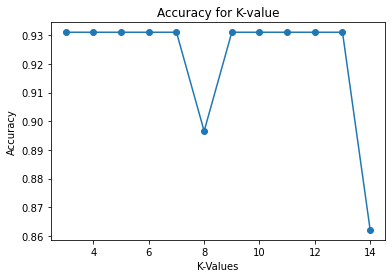

In [33]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('K-Values')
plt.ylabel('Accuracy')
plt.title('Accuracy for K-value')
plt.show()

In [34]:
classifier= KNeighborsClassifier(n_neighbors=9,metric='minkowski')
knn_model= classifier.fit(x_train,y_train)
y_predict= knn_model.predict(x_test)

In [35]:
f1_score(y_test,y_predict,average='micro')

0.9310344827586207

In [36]:
confusion_matrix(y_test,y_predict)

array([[ 9,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 10]], dtype=int64)

# Decision tree

In [37]:
 from sklearn.tree import DecisionTreeClassifier
dt=  DecisionTreeClassifier()
dt_model=dt.fit(x_train,y_train)
y_predict =dt_model.predict(x_test)
f1_score(y_test,y_predict,average='micro')

0.9655172413793104

In [38]:
confusion_matrix(y_test,y_predict)

array([[ 9,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

from f1 score we can conclude that Decision tree and logistic regression are the best models